Unit 7 | Assignment - Distinguishing Sentiments

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news outlets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.

Your final Jupyter notebook must:

Pull last 100 tweets from each outlet.
Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
Export the data in the DataFrame into a CSV file.
Save PNG images for each plot.

In [158]:
# List all Dependencies
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy 
import json
import requests

from pprint import pprint
import time
import random

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [159]:
# Twitter Keys located in config file
from config import (consumer_key, consumer_secret, access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [160]:
# Target the following News Organizations: BBC, CBS, CNN, Fox, and New York times
target_user = ['@BBC', '@CBS', "@CNN", "@FoxNews", "@nytimes"]
filename = ["bbc_sentiment", "cbs_sentiment", "cnn_sentiment", "fox_sentiment", "nyt_sentiment"]

In [161]:
# Create Function that takes sentiment of news organization

def NewsOrg_sentiment(target):
    counter = 1
    sentiments = []
    public_tweet = api.user_timeline(target, count = 100 )
    
    for tweet in public_tweet:
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        sentiments.append({
            "twitter source account" : target,
            "Tweets ago" : tweets_ago,
            "Date" : tweet['created_at'],
            "Compound" : compound,
            'Negative' : neg,
            "Positive"  : pos,
            "Neutral"  : neu,
            "tweet_text" : tweet["text"]
            
        })
        
        counter = counter + 1

    # Create into DataFrame
    data= pd.DataFrame.from_dict(sentiments)
    data.sort_index(axis=0 ,ascending =False, inplace = True)  
    
    return  data

In [162]:
# Target sentiment for each organization

bbc_sentiment = NewsOrg_sentiment('@BBC')
cbs_sentiment = NewsOrg_sentiment('@CBS')
cnn_sentiment = NewsOrg_sentiment("@CNN")
fox_sentiment = NewsOrg_sentiment("@FoxNews")
nyt_sentiment = NewsOrg_sentiment("@nytimes")

In [163]:
# Save data to CSV files

bbc_sentiment.to_csv('BBC_sentiment.csv')
cbs_sentiment.to_csv('CBS_sentiment.csv')
cnn_sentiment.to_csv('CNN_sentiment.csv')
fox_sentiment.to_csv('FOX_sentiment.csv')
nyt_sentiment.to_csv('NYT_sentiment.csv')

In [164]:
# Take a look at the data for column names
bbc_sentiment.head()
cbs_sentiment.head()

,Compound,Date,Negative,Neutral,Positive,Tweets ago,tweet_text,twitter source account
99,0.1511,Mon Jun 11 01:08:28 +0000 2018,0.0,0.898,0.102,100,RT if that musical number by the cast of Carou...,@CBS
98,0.6369,Mon Jun 11 01:12:31 +0000 2018,0.0,0.625,0.375,99,RT @McBenefit: I love everything about you @Uz...,@CBS
97,0.9151,Mon Jun 11 01:19:59 +0000 2018,0.0,0.543,0.457,98,So many feels at the #TonyAwards. Congratulati...,@CBS
96,0.4019,Mon Jun 11 01:24:12 +0000 2018,0.0,0.838,0.162,97,.@Matt_Morrison welcomes the Marjory Stoneman ...,@CBS
95,0.0000,Mon Jun 11 01:24:46 +0000 2018,0.0,1.000,0.000,96,Such a touching moment at the #TonyAwards. ❤️ ...,@CBS


In [165]:
def plotting_scatter(x, y, color, label) :  
    return plt.scatter(x, y, c = color, alpha = 0.5,  s = 200,  label = label)

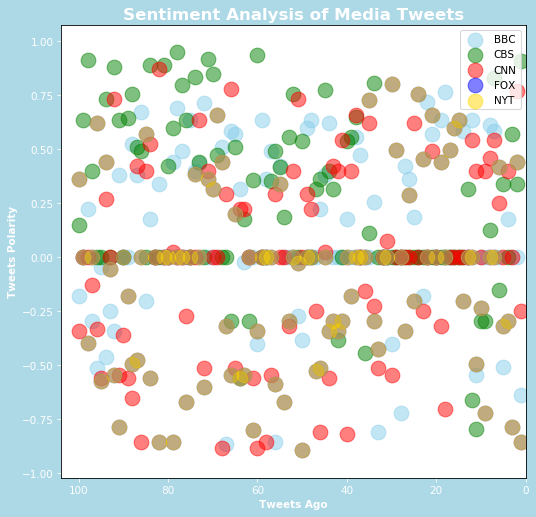

<Figure size 432x288 with 0 Axes>

In [166]:
# Plot Sentiment Analysis of Tweets
fig = plt.figure(figsize=(8, 8), dpi=75, facecolor='lightblue', edgecolor='k')

plotting_scatter(bbc_sentiment['Tweets ago'], bbc_sentiment['Compound'], "skyblue", 'BBC')
plotting_scatter(cbs_sentiment['Tweets ago'], cbs_sentiment['Compound'], "green", 'CBS')
plotting_scatter(cnn_sentiment['Tweets ago'], cnn_sentiment['Compound'], "red", 'CNN')
plotting_scatter(fox_sentiment['Tweets ago'], fox_sentiment['Compound'], "blue", 'FOX')
plotting_scatter(fox_sentiment['Tweets ago'], fox_sentiment['Compound'], "gold", 'NYT')

plt.legend(loc = "best")
plt.title("Sentiment Analysis of Media Tweets", fontsize = 16, color="white", fontweight='bold')
plt.xlabel("Tweets Ago", color="white", fontweight="bold")
plt.ylabel("Tweets Polarity", color="white", fontweight="bold")
plt.xlim(104,-0.04)


# Changing tick colors to match title
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.show()

plt.savefig("Sentiment Analysis of Media Tweets")

In [169]:
# Now find the averages values for all overall media sentiment
x =  {"BBC" : np.mean(bbc_sentiment['Compound']), "CBS" : np.mean(cbs_sentiment['Compound']),
      "CNN" : np.mean(cnn_sentiment['Compound']), "FOX": np.mean(fox_sentiment['Compound']),
      "NYT": np.mean(nyt_sentiment['Compound'])}

x

{'BBC': 0.11745299999999997,
 'CBS': 0.24888500000000005,
 'CNN': 0.007866999999999983,
 'FOX': -0.08324499999999997,
 'NYT': 0.0016450000000000024}

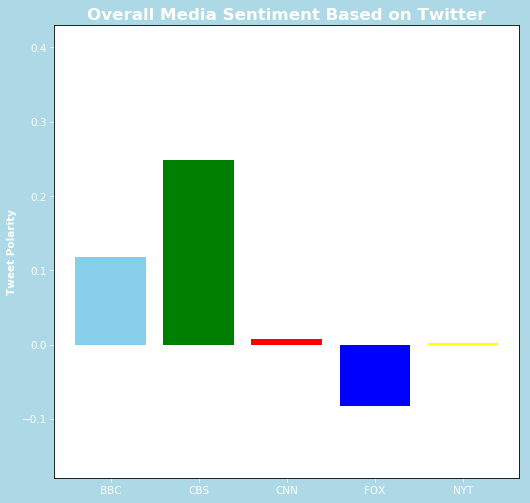

<Figure size 432x288 with 0 Axes>

In [168]:
# Plot bar graph
fig = plt.figure(figsize=(8, 8), dpi=75, facecolor='lightblue', edgecolor='k')
plt.bar(x.keys(), x.values(), color = ['skyblue', 'green', 'red', 'blue', 'yellow'])

# Styling the chart to match Twitter aesthetic
plt.title('Overall Media Sentiment Based on Twitter', fontsize = 16, color="white", fontweight='bold')
plt.ylabel("Tweet Polarity", color="white", fontweight='bold')
plt.ylim(-0.18, 0.43)

# Changing tick colors to match title
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.show()

plt.savefig("Overall Media Sentiments Based on Twitter")

As expected, Fox has a negative score and CNN's coverage of Trump after he took office seemed to have decreased CNN's overall sentiment. Interesting!